In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import som_class
importlib.reload(som_class)
from som_class import plot_u_matrix_hex, SelfOrganizingMapHex, plot_feature_map_hex, plot_weight_component_hex
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Loading

In [29]:
data = pd.read_csv('Main Data_SOM.csv')
data.head()

,Index,d__Archaea;__;__;__;__;__,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanocorpusculaceae;g__Methanocorpusculum,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanomicrobiaceae;g__Methanoculleus,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanomicrobiaceae;g__Methanomicrobium,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanomicrobiaceae;g__uncultured,d__Archaea;p__Halobacterota;c__Methanosarcinia;o__Methanosarciniales;f__Methanosarcinaceae;g__Methanimicrococcus,d__Archaea;p__Halobacterota;c__Methanosarcinia;o__Methanosarciniales;f__Methanosarcinaceae;g__Methanosarcina,...,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Puniceicoccaceae;g__Verruc-01,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;g__DEV114,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured;g__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae;g__Luteolibacter,Unassigned;__;__;__;__;__,Acetic Acid,Butyric Acid,Hexanoic Acid,Methane
0,Zero (Phase 2),0,33,46,9,0,104,0,0,0,...,0,0,0,89,0,0,4404.172920,699.847659,12.449266,0.000
1,3R,0,30,7,24,0,0,0,0,0,...,0,0,0,24,0,0,5387.473707,963.449744,0.000000,7.989
2,5R,0,0,0,54,0,41,0,0,0,...,0,7,0,16,0,0,4155.655943,831.067581,15.527975,11.704
3,8R,0,0,0,182,0,28,0,0,0,...,0,10,0,13,0,0,5774.070236,1264.559493,8.366359,13.839
4,10R,0,0,0,385,0,0,0,25,0,...,0,18,0,14,2,0,7168.649163,1771.166592,20.882474,15.246


In [30]:
print(data.shape)

(87, 532)


In [31]:
#num_unkown = 0
#for column in data.columns:
    #print(column)
    #column_values = column.split(";")
    #column_name = column_values[-1]
    #if column_name == "__":
        #num_unkown += 1
        #column_name = f"unknown_{column_values[0]}_{num_unkown}"

    #data.rename(columns={column: column_name}, inplace=True)
#data.head()

In [32]:
data = data.drop(columns="Index")
target_columns = ["Acetic Acid", "Butyric Acid", "Hexanoic Acid", "Methane"]
data_columns = [col for col in data.columns if col not in target_columns]
inputs = data[data_columns]
targets = data[target_columns]
inputs


,d__Archaea;__;__;__;__;__,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanocorpusculaceae;g__Methanocorpusculum,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanomicrobiaceae;g__Methanoculleus,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanomicrobiaceae;g__Methanomicrobium,d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanomicrobiaceae;g__uncultured,d__Archaea;p__Halobacterota;c__Methanosarcinia;o__Methanosarciniales;f__Methanosarcinaceae;g__Methanimicrococcus,d__Archaea;p__Halobacterota;c__Methanosarcinia;o__Methanosarciniales;f__Methanosarcinaceae;g__Methanosarcina,d__Archaea;p__Thermoplasmatota;c__Thermoplasmata;o__Methanomassiliicoccales;f__Methanomassiliicoccaceae;g__Methanomassiliicoccus,...,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Puniceicoccaceae;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Puniceicoccaceae;g__Cerasicoccus,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Puniceicoccaceae;g__Puniceicoccus,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Puniceicoccaceae;g__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Puniceicoccaceae;g__Verruc-01,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;g__DEV114,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__uncultured;f__uncultured;g__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Rubritaleaceae;g__Luteolibacter,Unassigned;__;__;__;__;__
0,0,33,46,9,0,104,0,0,0,0,...,0,0,0,0,0,0,0,89,0,0
1,0,30,7,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,0,0
2,0,0,0,54,0,41,0,0,0,0,...,33,0,0,71,0,7,0,16,0,0
3,0,0,0,182,0,28,0,0,0,0,...,61,0,0,146,0,10,0,13,0,0
4,0,0,0,385,0,0,0,25,0,0,...,144,0,0,318,0,18,0,14,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,0,0
84,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34,0,0
85,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0


# Feature Selection

In [33]:
# fit a random forest model for each target measure feature importance
feature_importances = pd.DataFrame(index=target_columns, columns=data_columns)
normed_inputs = (inputs - inputs.min()) / (inputs.max() - inputs.min())
normed_outputs = (targets - targets.min()) / (targets.max() - targets.min())
X_train, X_test, y_train, y_test = train_test_split(normed_inputs, normed_outputs, test_size=0.2, random_state=42, shuffle=True)

for target in target_columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[target])
    importances = model.feature_importances_
    feature_importances.loc[target] = importances
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    print(f"{target} - MSE: {mse:.4f}, R2: {r2:.4f}")

feature_importances_mean = feature_importances.to_numpy().astype(float).mean(axis=0)
feature_importances_mean = feature_importances_mean / np.sum(feature_importances_mean)
feature_importances_ranked = pd.Series(feature_importances_mean, index=data_columns).sort_values(ascending=False)

print(feature_importances_ranked)

Acetic Acid - MSE: 0.0209, R2: 0.1198
Butyric Acid - MSE: 0.0322, R2: 0.3685
Butyric Acid - MSE: 0.0322, R2: 0.3685
Hexanoic Acid - MSE: 0.0068, R2: 0.7192
Hexanoic Acid - MSE: 0.0068, R2: 0.7192
Methane - MSE: 0.0091, R2: 0.7749
d__Archaea;p__Halobacterota;c__Methanosarcinia;o__Methanosarciniales;f__Methanosarcinaceae;g__Methanosarcina                                                    0.114069
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae;g__Petrimonas                                                                  0.091988
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ethanoligenenaceae;g__Incertae_Sedis                                                              0.077529
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Caproiciproducens                                                              0.033894
d__Bacteria;p__Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;f__Peptostrepto

In [34]:
feature_variance_threshold = 0.90
cumulative_importance = feature_importances_ranked.cumsum()
#for i in range(len(cumulative_importance)):
    #print(f"{i}: {cumulative_importance.iloc[i]}")


In [35]:
num_important_features = np.where(cumulative_importance <= feature_variance_threshold)[0][-1]
print(f"Number of features to reach {feature_variance_threshold*100}% importance: {num_important_features+1}")

important_features = feature_importances_ranked.index[:num_important_features+1]
unimportant_features = feature_importances_ranked.index[num_important_features+1:]

filtered_data = inputs[important_features]
print(filtered_data.shape)

Number of features to reach 90.0% importance: 98
(87, 98)


# SOM Features Held Out

(<Figure size 1200x1000 with 2 Axes>,
 <Axes: title={'center': 'U-Matrix (Unified Distance Matrix)'}>,
 {(0, 0): np.float64(0.175321654571234),
  (1, 0): np.float64(0.14755392291866765),
  (2, 0): np.float64(0.13381841001956524),
  (3, 0): np.float64(0.5543624767300515),
  (4, 0): np.float64(0.5223961478474831),
  (5, 0): np.float64(0.32279936782752283),
  (6, 0): np.float64(0.38097720149499953),
  (7, 0): np.float64(0.4268129523646331),
  (8, 0): np.float64(0.5833730180614328),
  (9, 0): np.float64(0.5685530194557394),
  (10, 0): np.float64(0.1725386999428091),
  (11, 0): np.float64(0.2832553080266634),
  (12, 0): np.float64(0.236014505720321),
  (13, 0): np.float64(0.28742599457104145),
  (14, 0): np.float64(0.3078367750696535),
  (0, 1): np.float64(0.1406852992493485),
  (1, 1): np.float64(0.12675717804267114),
  (2, 1): np.float64(0.44888382162413726),
  (3, 1): np.float64(0.5171233521995933),
  (4, 1): np.float64(0.25697670723575416),
  (5, 1): np.float64(0.2682652891862857),
  (6

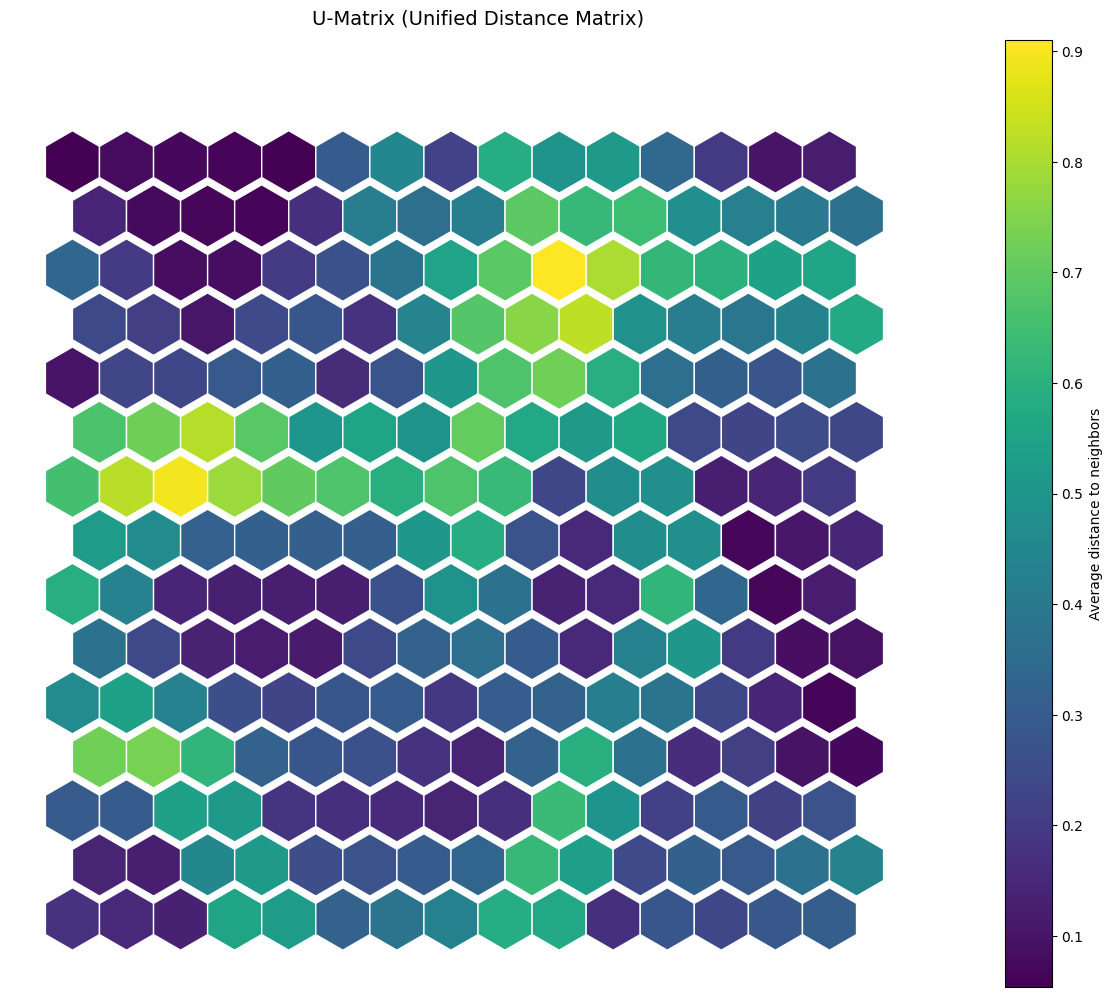

In [36]:
som = SelfOrganizingMapHex(15, 15, filtered_data.shape[1])

training_data = filtered_data.to_numpy()
scaled_training_data = (training_data - training_data.min(axis=0)) / (training_data.max(axis=0) - training_data.min(axis=0))

som.train(scaled_training_data, num_epochs=1000, learning_rate=0.5, radius=5)

plot_u_matrix_hex(som, figsize=(12, 10))


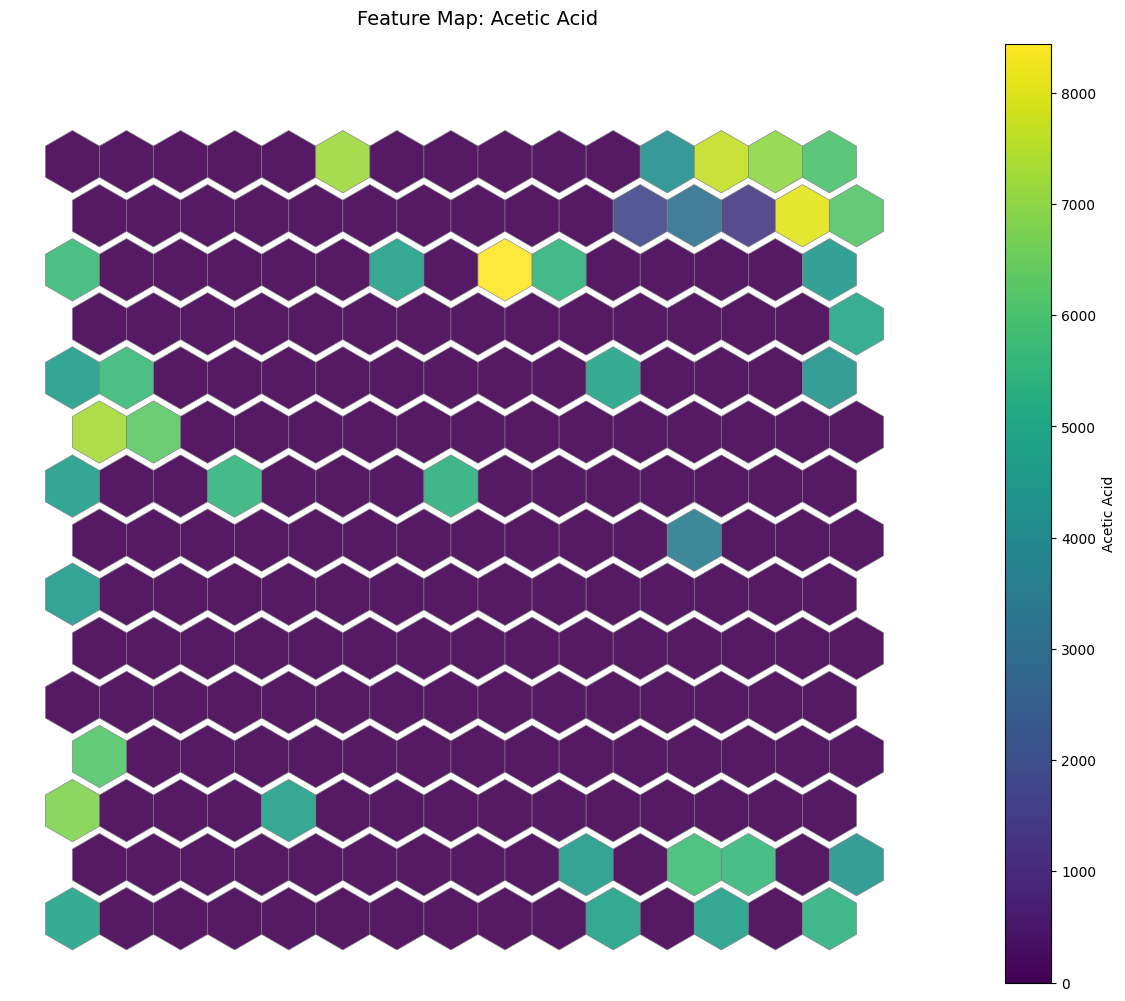

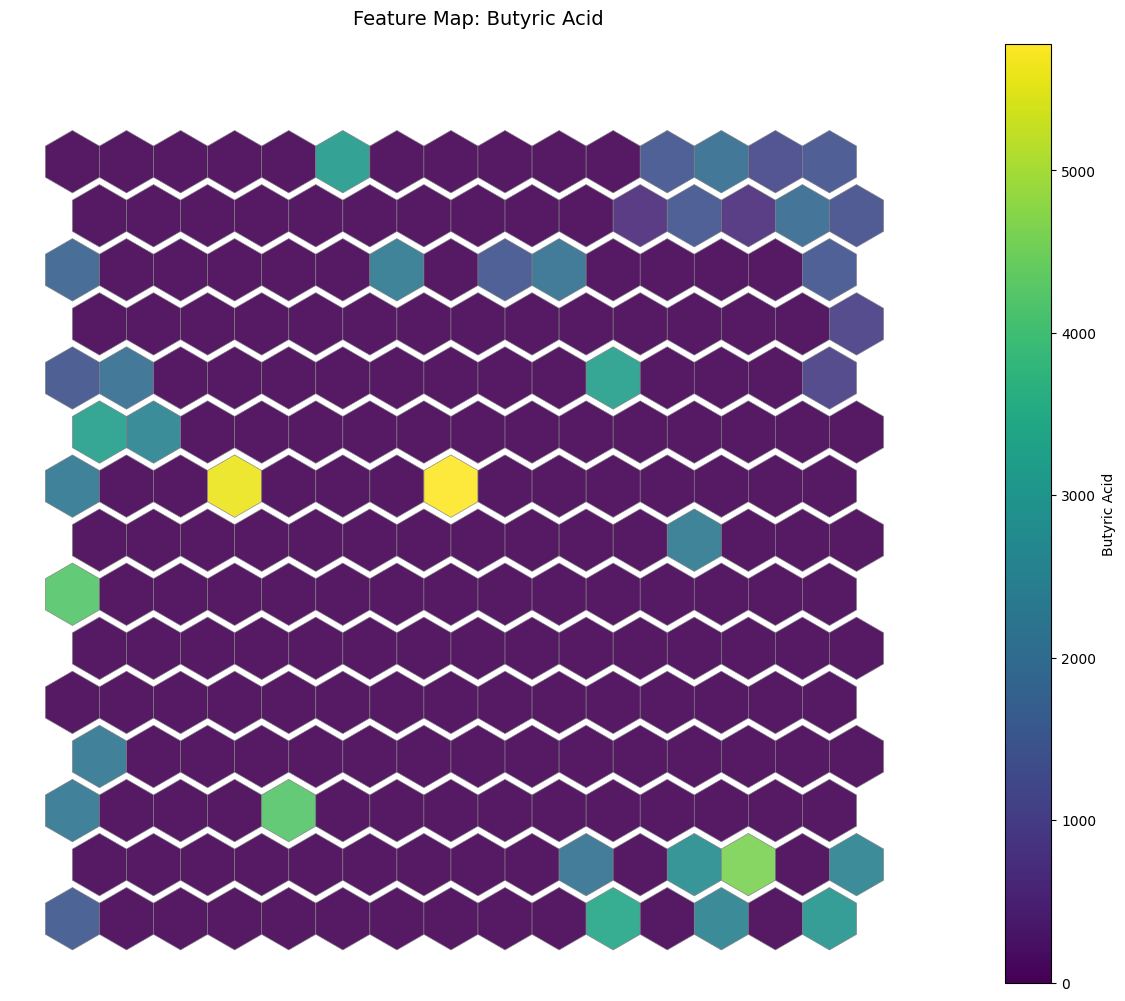

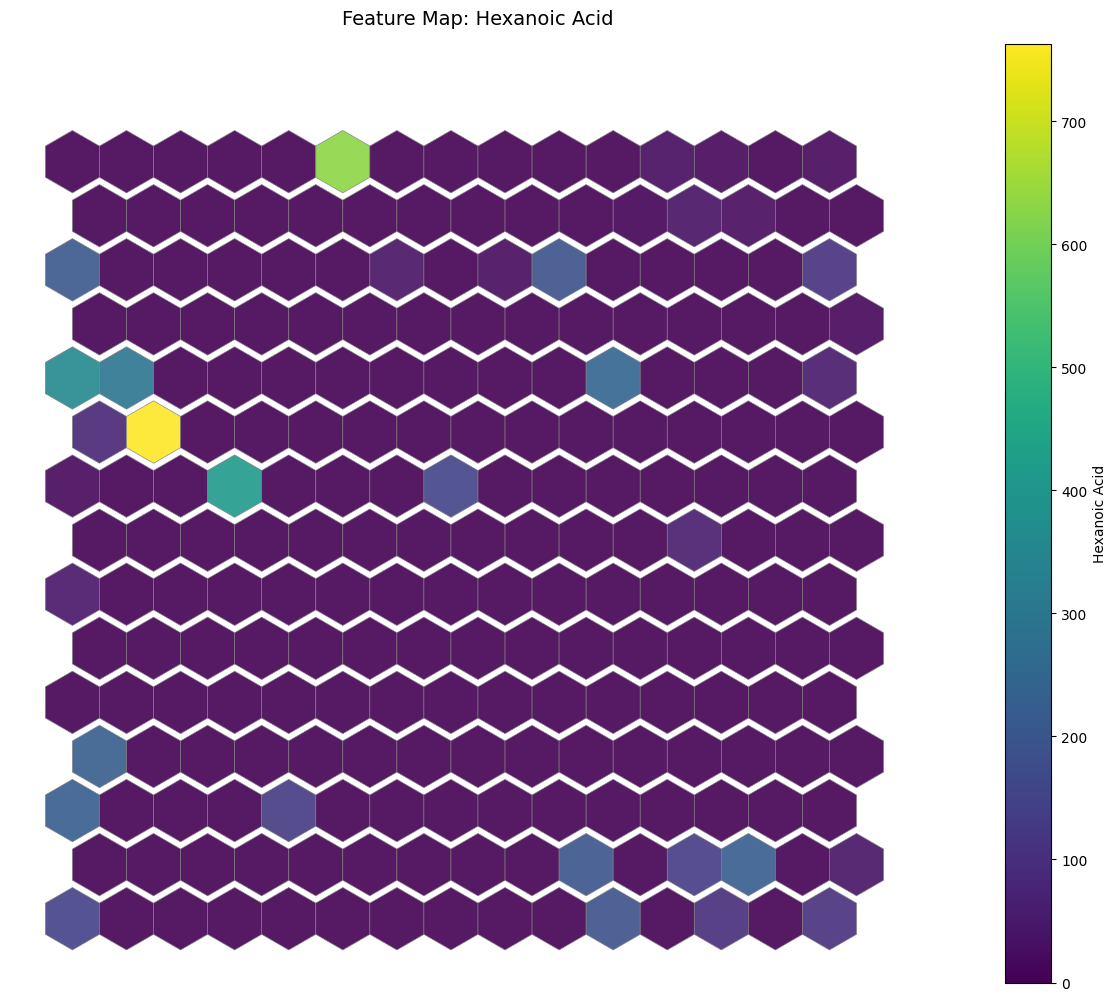

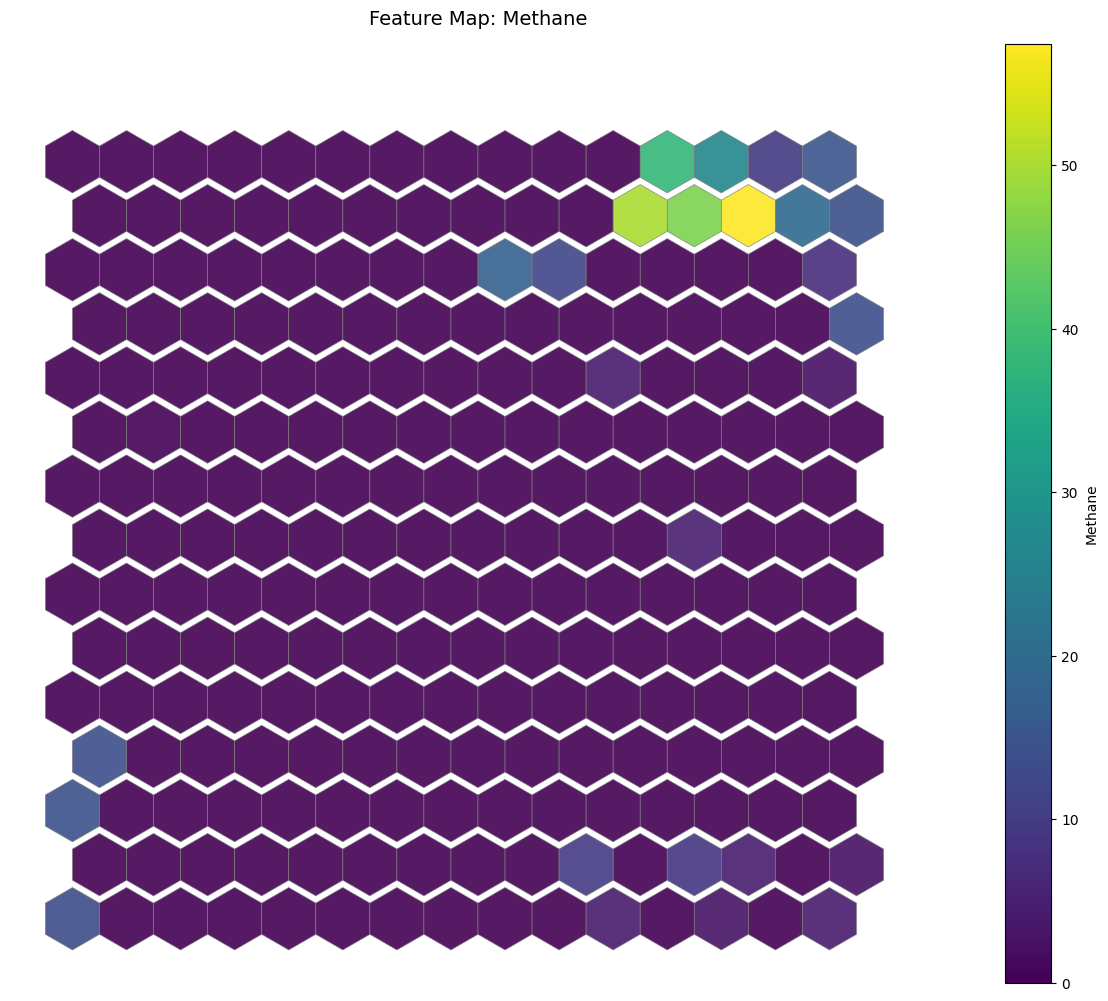

In [37]:
for feature_name in target_columns:
    plot_feature_map_hex(som, scaled_training_data, targets[feature_name].to_numpy(), feature_name=feature_name)

# SOM with Features

(<Figure size 1200x1000 with 2 Axes>,
 <Axes: title={'center': 'U-Matrix (Unified Distance Matrix)'}>,
 {(0, 0): np.float64(0.6979818983439001),
  (1, 0): np.float64(0.6648352480035731),
  (2, 0): np.float64(0.4299231655122495),
  (3, 0): np.float64(0.45128110459782156),
  (4, 0): np.float64(0.5147831323190128),
  (5, 0): np.float64(0.45219205544976415),
  (6, 0): np.float64(0.47354493330939623),
  (7, 0): np.float64(0.6087547698294511),
  (8, 0): np.float64(0.5003064649213977),
  (9, 0): np.float64(0.19856821777481098),
  (10, 0): np.float64(0.24277308786750273),
  (11, 0): np.float64(0.6697374834640812),
  (12, 0): np.float64(0.7031312734997562),
  (13, 0): np.float64(0.4046138026832588),
  (14, 0): np.float64(0.7996346534050923),
  (0, 1): np.float64(0.5781093915202987),
  (1, 1): np.float64(0.4917992632203913),
  (2, 1): np.float64(0.4056526023260066),
  (3, 1): np.float64(0.5252867566458311),
  (4, 1): np.float64(0.5752082149443093),
  (5, 1): np.float64(0.49673228602004427),
  (6

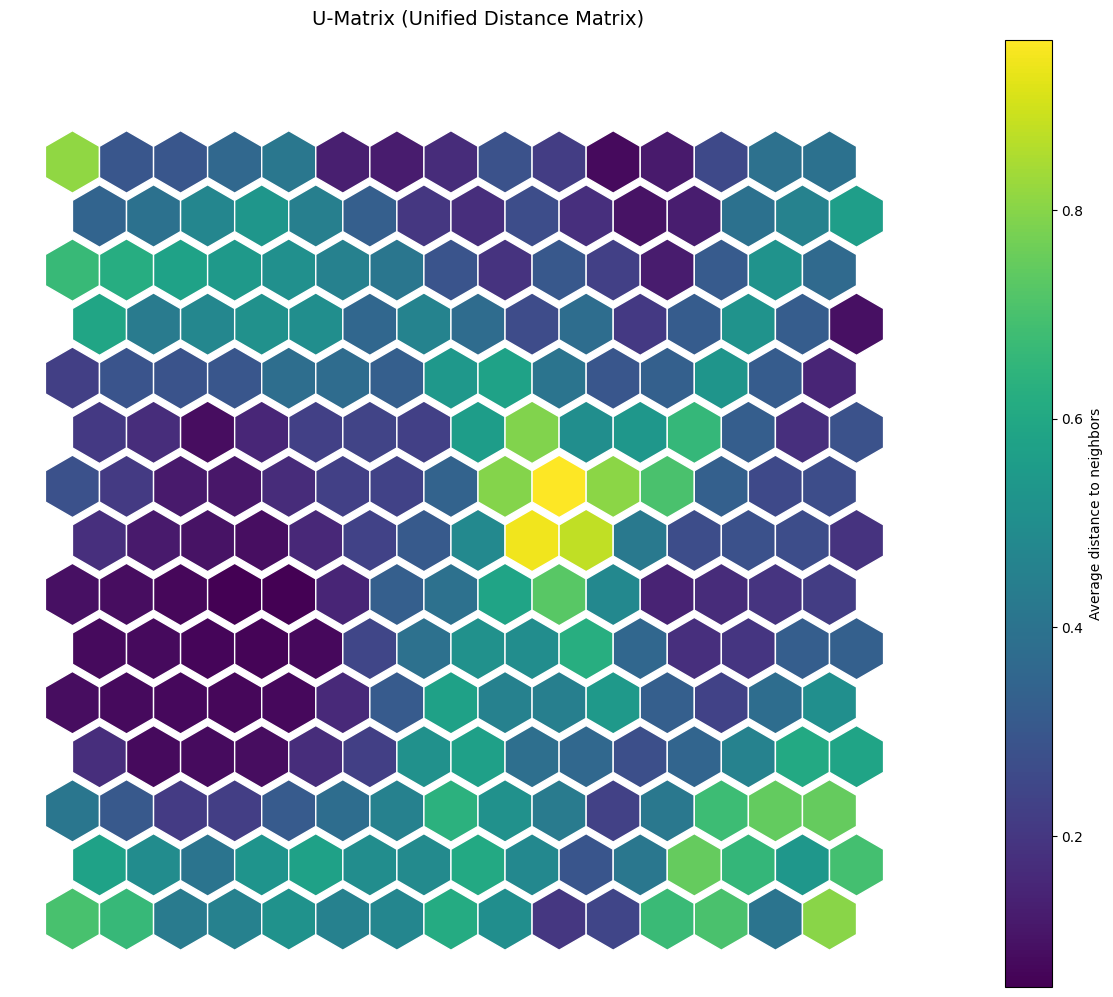

In [39]:
normed_full_inputs = (data-data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
normed_full_inputs = normed_full_inputs.drop(columns=unimportant_features)

som_full = SelfOrganizingMapHex(15, 15, normed_full_inputs.shape[1])

som_full.train(normed_full_inputs.to_numpy(), num_epochs=1000, learning_rate=0.5, radius=5)

plot_u_matrix_hex(som_full, figsize=(12, 10))

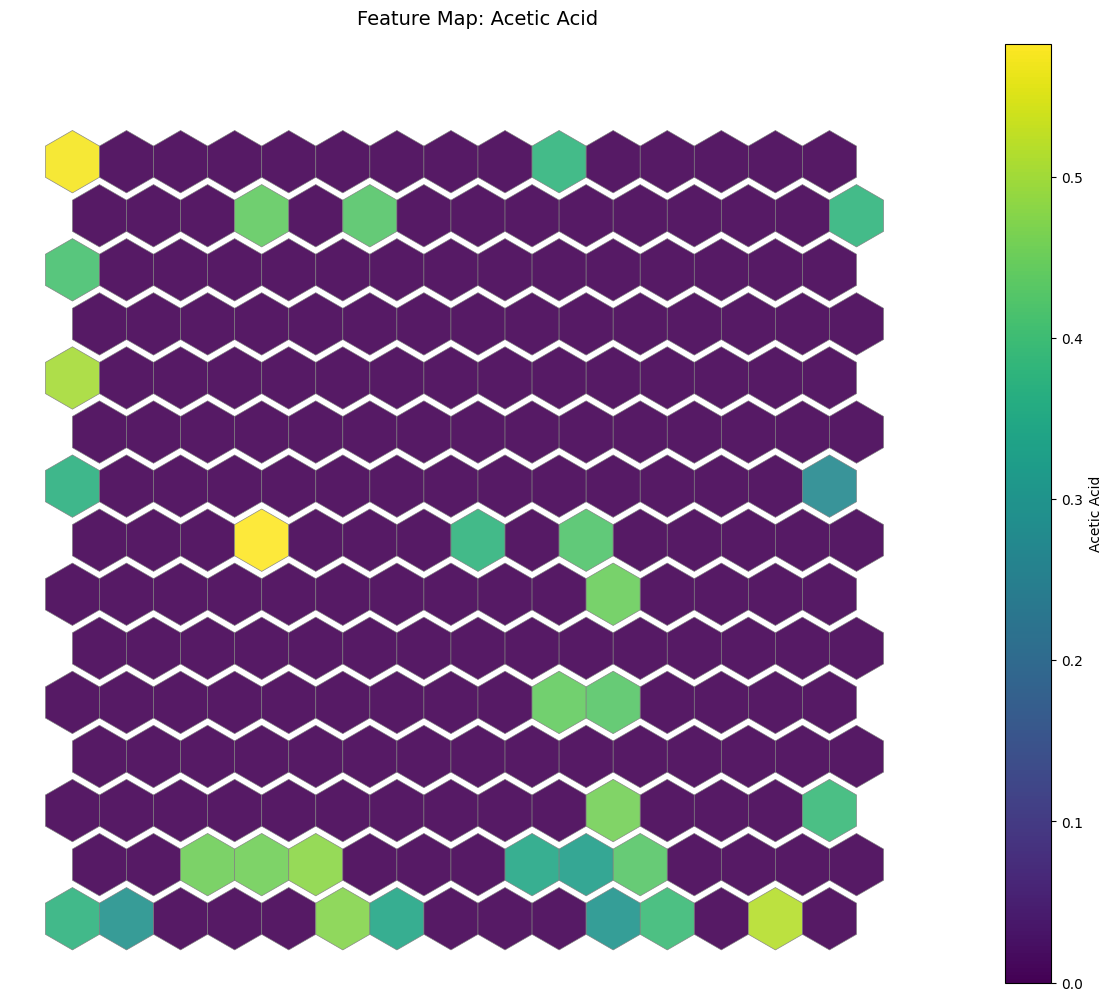

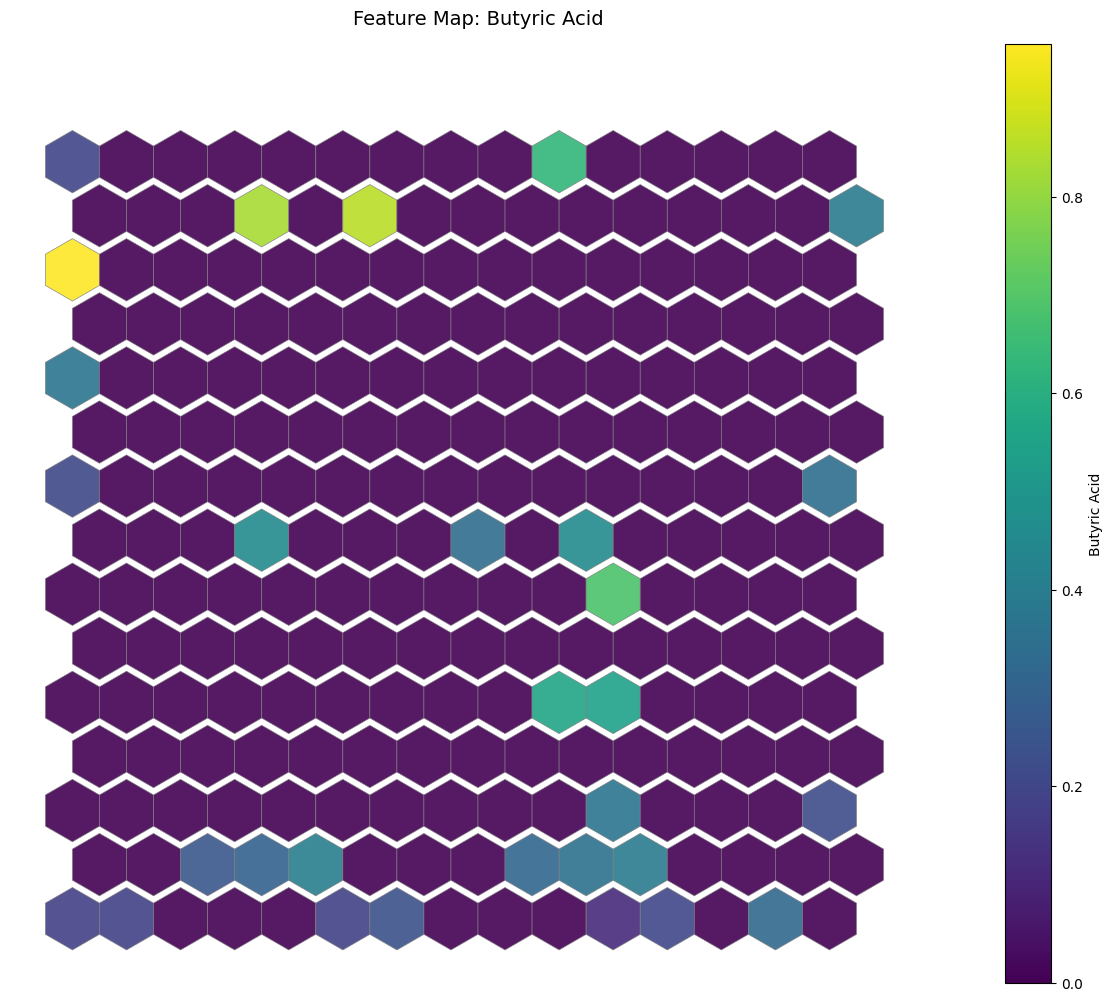

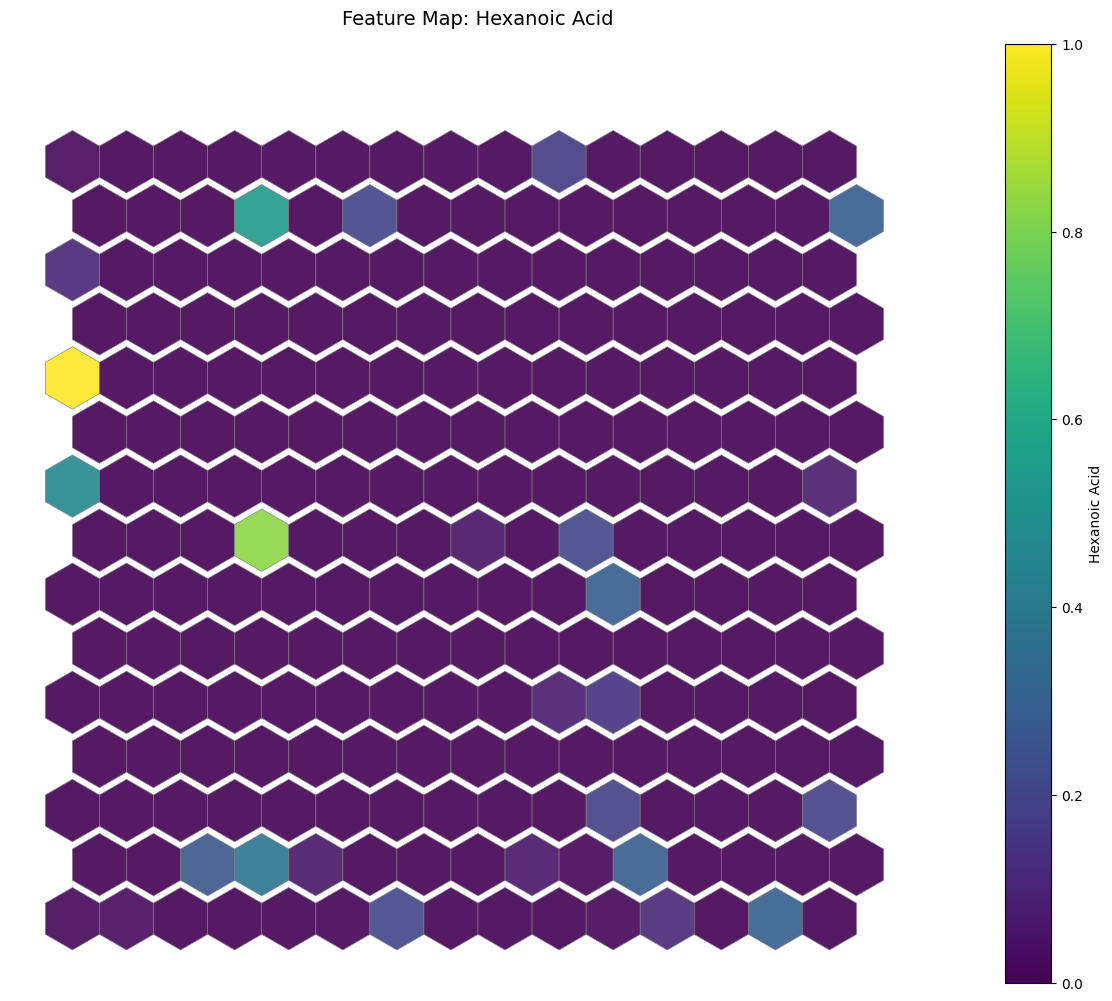

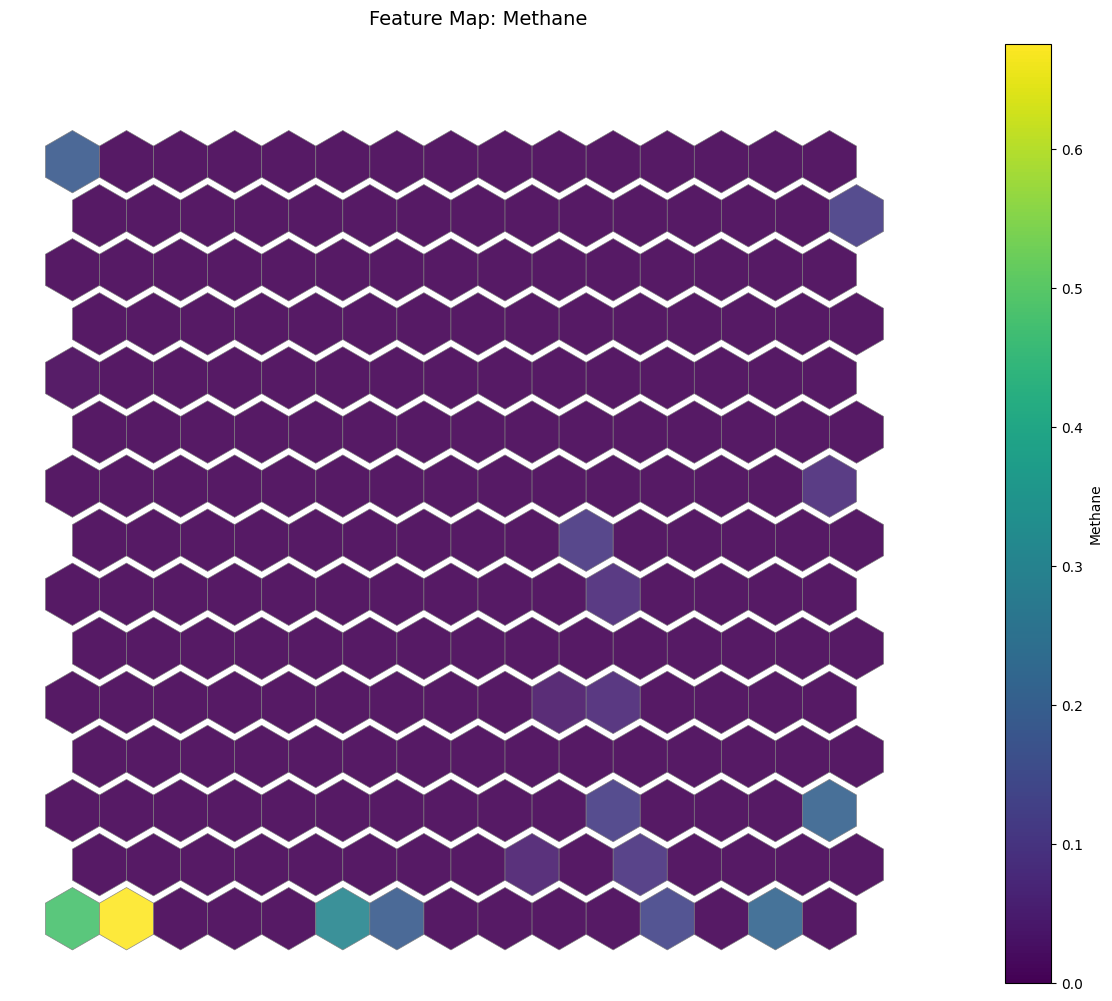

In [40]:
for feature_name in target_columns:
    plot_feature_map_hex(som_full, normed_full_inputs.to_numpy(), normed_full_inputs[feature_name].to_numpy(), feature_name=feature_name)

## Plot trained vector values

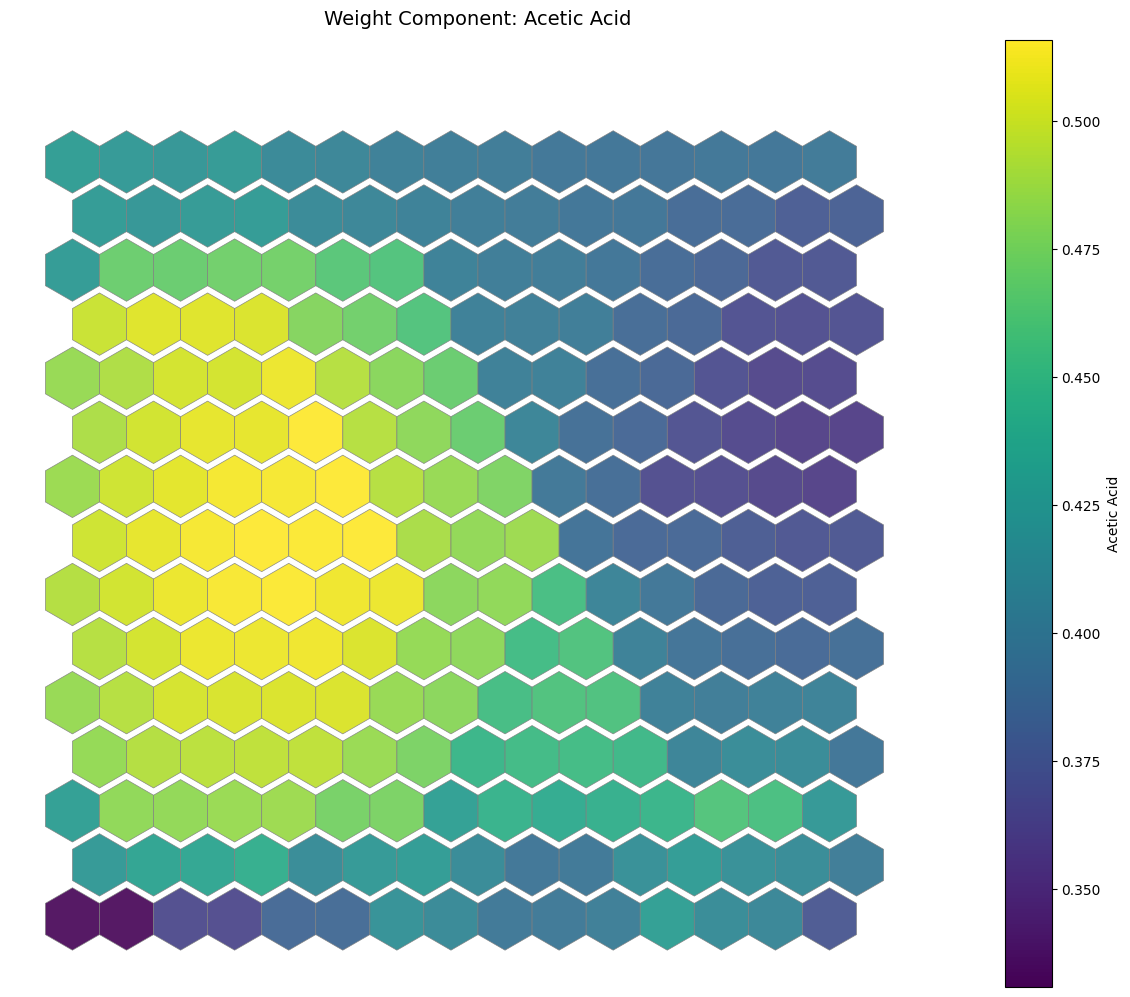

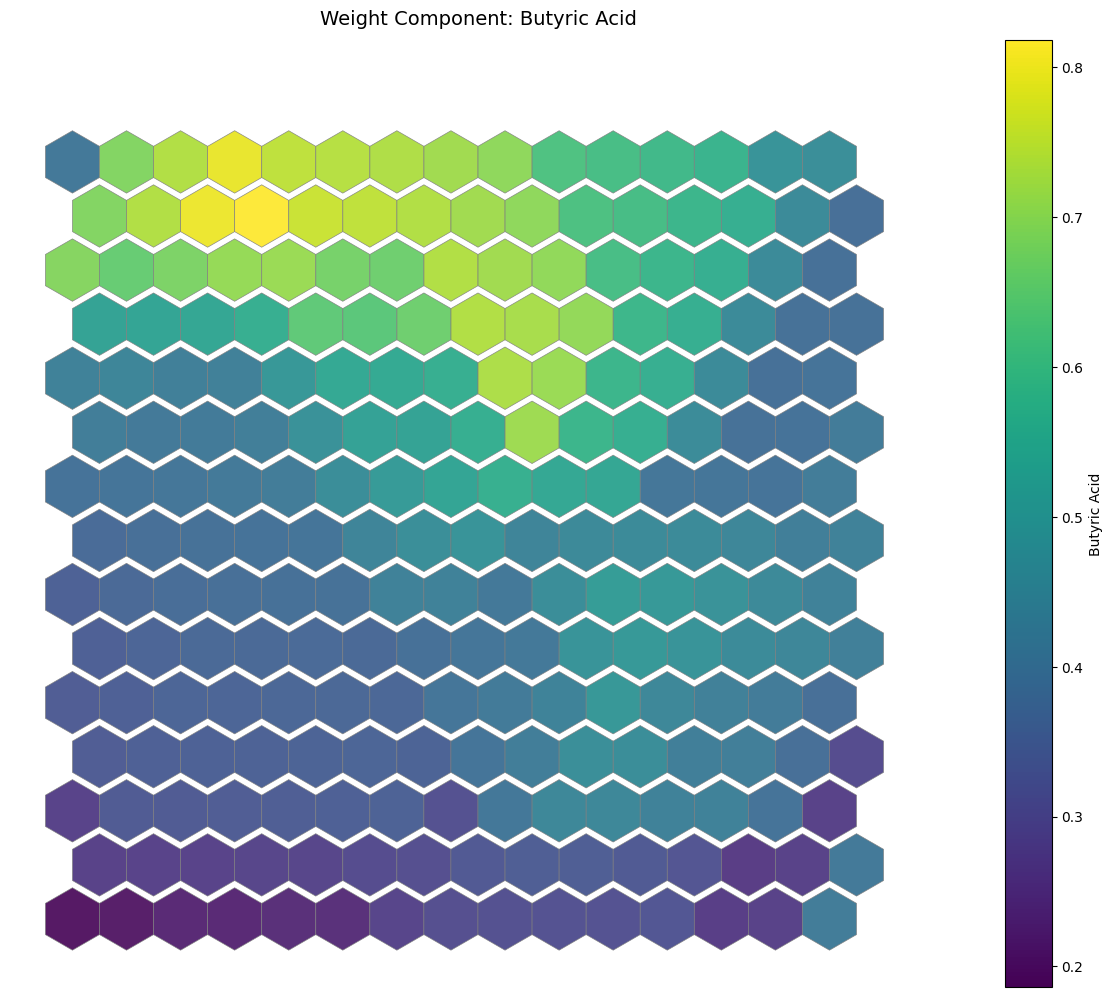

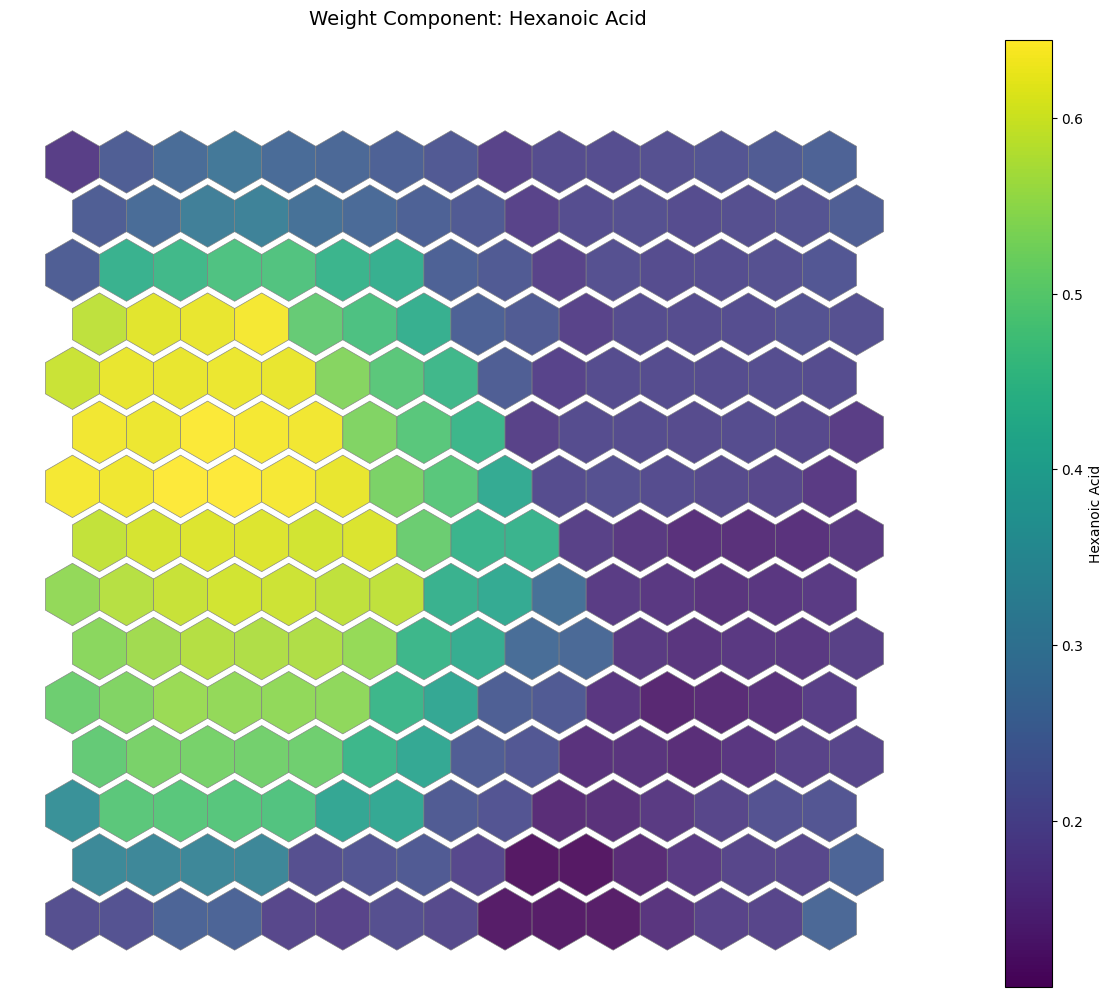

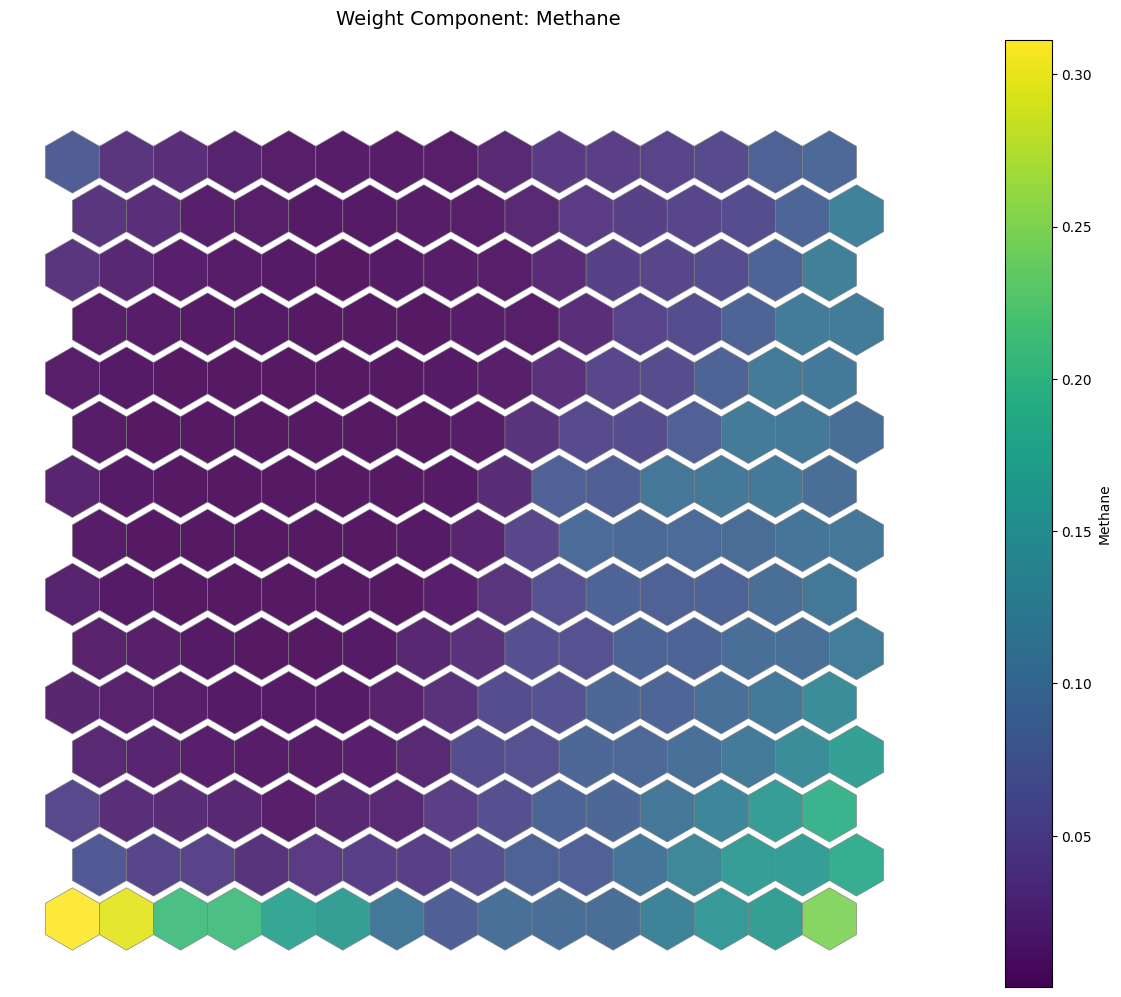

In [44]:
for feature_name in target_columns:
    component_idx = list(normed_full_inputs.columns).index(feature_name)
    plot_weight_component_hex(som_full, component_idx=component_idx, component_name=feature_name)